In [1]:
! pip install -q kaggle

! mkdir ~/.kaggle

In [2]:
! echo '{"username":"ronggurmwp","key":"659addeda6fe20f4cdbb154d65d80c1b"}' >> kaggle.json

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets list

In [5]:
! kaggle datasets download -d marquis03/vehicle-classification

 99% 909M/914M [00:43<00:00, 21.5MB/s]
100% 914M/914M [00:43<00:00, 22.1MB/s]


In [6]:
! unzip vehicle-classification

Archive:  vehicle-classification.zip
  inflating: test/01ab0c4e74e5cefbc25e78e8b2b4b30d.jpg  
  inflating: test/02a43a441f5c71ab9ff8ecab1f33ca49.jpg  
  inflating: test/0419f656d61b42a6b2d567ed9ab6673f.jpg  
  inflating: test/050aab9a8a91dca8ed1e518ebf42ee0d.jpg  
  inflating: test/05a006ebd8667a39988a253b10956bb7.jpg  
  inflating: test/066c695f141f27ea881df8af5a827c99.jpg  
  inflating: test/0930125614a5dbbb8e5c5ee450586a13.jpg  
  inflating: test/0967287cbb2b14ed9dc1ec6a1a53b21d.jpg  
  inflating: test/09bbbd3f758e129a2692844e3b62d5a8.jpg  
  inflating: test/0a5067c35b854ce7213e433d12ea500d.jpg  
  inflating: test/0abad4440c4415b9707f11151762526c.jpg  
  inflating: test/0b63fb15f9c403994e140b5a000088be.jpg  
  inflating: test/0cc36cf65da889e22fe9264c3079c459.jpg  
  inflating: test/0ea9451a8de9cf7581835ccb20940174.jpg  
  inflating: test/124db00b777b961fa8ca28fc05d7c130.jpg  
  inflating: test/12c90c522b52cdc2a5c4d460960163e8.jpg  
  inflating: test/1401fca7a89ef05e7cd9c154a33966f3.

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict
import cv2
from PIL import Image
import keras
# For one-hot-encoding
# from keras.utils import np_utils
from keras.utils import to_categorical
# For creating sequenttial model
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
# For saving and loading models
from keras.models import load_model


import random


In [8]:
classes = os.listdir('./train')
BASE = './train/'

# create dict of list of images per class
dataset = {}
for vehicle in classes:
    print(vehicle)
    dataset[vehicle] = [i for i in os.listdir(BASE + vehicle)]

family sedan
heavy truck
SUV
minibus
fire engine
bus
racing car
truck
jeep
taxi


In [9]:
print(len(dataset['minibus']))

print(dataset.keys())
print(len(dataset.keys()))

140
dict_keys(['family sedan', 'heavy truck', 'SUV', 'minibus', 'fire engine', 'bus', 'racing car', 'truck', 'jeep', 'taxi'])
10


In [10]:
# convert dict to pandas df
df = pd.DataFrame.from_dict(dataset, orient='index')
df = df.transpose()

In [11]:
df.head()

family sedan                           heavy truck  \
0  2049fd979d25dc2b06d30b2ab323f256.jpg  6c2592fbfd679907364e70b282d23d89.jpg   
1  b82e1a69e0516ec51be7734bc36e4166.jpg  4df34ed2086a6ceeb032d3236a79029f.jpg   
2  b21ee71791fa00d10f38097a445cb6a8.jpg  1407b6745a7a4e86f6177bfee515da78.jpg   
3  61a90391d12a57e941e20d8b9baa1b3b.jpg  831ef0f24c85f02992af45c33a46e2fa.jpg   
4  5f8dc21530d62ff58884682056fce728.jpg  65bfdf2314d45b4e77a5eedbf362aad0.jpg   

                                    SUV                               minibus  \
0  68982af790e338605e590e05f829f913.jpg  86f36bd09a2d9746ee4f08d03d258815.jpg   
1  29277a4bef7cf90962e1d88d251dd6b2.jpg  c507c34e2d4c90abe903b4969d98d4d9.jpg   
2  4eb50879e8138e233816c4a69df8ffae.jpg  1922868c3a9afedb01613a53e8c51e8f.jpg   
3  45214809bcc5205ed622d5a648f73128.jpg  8dfd4e0a549d24ed31a3983828e882fb.jpg   
4  86bbb3c36a1a4d121ae2e7317c908559.jpg  55b86c65fb5972e7ec82404044361be2.jpg   

                            fire engine                                   bus  \
0  5e8b5132f84ddad0b0bf51d7d7beed96.jpg  41611b6b712a1aaf865508b6dd185729.jpg   
1  75f9093ff497fb5990c7c616be6f4625.jpg  e1b5a136fa90e01577e6d858ad4a6391.jpg   
2  6d495652d0aa2512ae5f5b79557c390b.jpg  d43140ef5562636d561e7a77acdf3dc4.jpg   
3  9d52efb81cd4c2f8ab664d2ff509b9f1.jpg  1d387a8481440443b6d2dc1705919877.jpg   
4  6e5f761fb15f77c4ed021235829a6837.jpg  3baa40f19358ffd68c93b60579553a7b.jpg   

                             racing car                                 truck  \
0  23f40d60e76391c72751f305ed749f95.jpg  e9b5c4d2e7c4de8d5abec5df31344097.jpg   
1  943a1c35c1bf50b7db6e451de008d664.jpg  d820bea22a6ab43a70c483f9bac69d64.jpg   
2  94b805beb311c29bcd09060082c554a0.jpg  ca0097a22d2630d9e7e720478e51be5c.jpg   
3  1c1503ed2d0eae3d5beb131e4249e3d1.jpg  44795863e63bfde7c2369a75453b17ff.jpg   
4  119e524741e7923db26a35b9c090e84f.jpg  0ba6b9ee096fc34a07deb2cd6fa53204.jpg   

                                   jeep                                  taxi  
0  35d7214c312c1ad1a05a667c0c6ff1dd.jpg  d3692d270ae6ddab96d6e05645710192.jpg  
1  645dc300edf44601a8e1e94d93ac9e11.jpg  938ee3cdc3a972d7237970ee569775bd.jpg  
2  f8d46cb63e3240e87b9f11a285a27d90.jpg  0b2ea1e3d263b4510e1a9754c25069e9.jpg  
3  37083b94b2639eed0b5a9e29023e651d.jpg  dc6e5faef448d17291b095f17c9167bf.jpg  
4  34c3e1097bafb1573717d7e2292724ae.jpg  5c90911c852db392a8c0a6004004150f.jpg

In [12]:
labels = df.columns

In [13]:
labels[6-1]

'bus'

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   family sedan  140 non-null    object
 1   heavy truck   140 non-null    object
 2   SUV           140 non-null    object
 3   minibus       140 non-null    object
 4   fire engine   140 non-null    object
 5   bus           140 non-null    object
 6   racing car    140 non-null    object
 7   truck         140 non-null    object
 8   jeep          140 non-null    object
 9   taxi          140 non-null    object
dtypes: object(10)
memory usage: 11.1+ KB


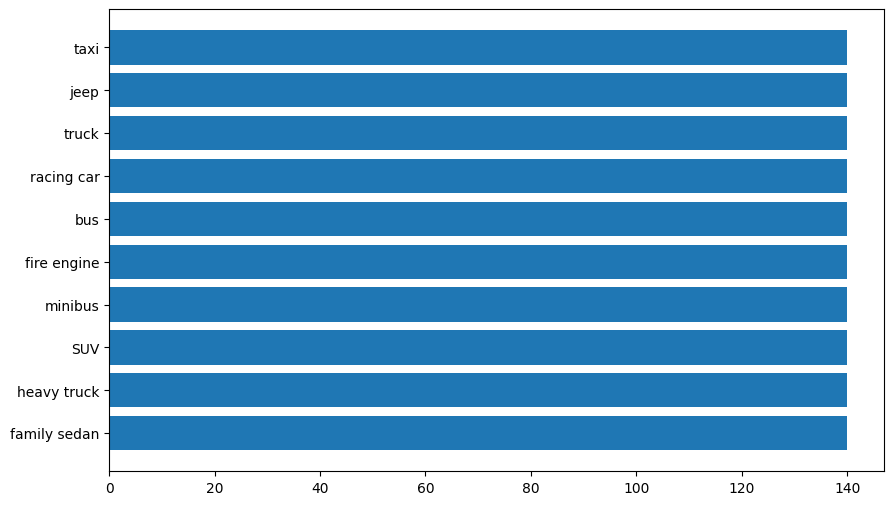

In [15]:
cols = []
col_imgs = []
for col in df.columns:
    cols.append(col)
    col_imgs.append(df[col].count())

plt.figure(figsize=(10,6))
plt.barh(cols, col_imgs)
plt.show()

Display 4 ranndom image setiap class


<Figure size 640x480 with 0 Axes>

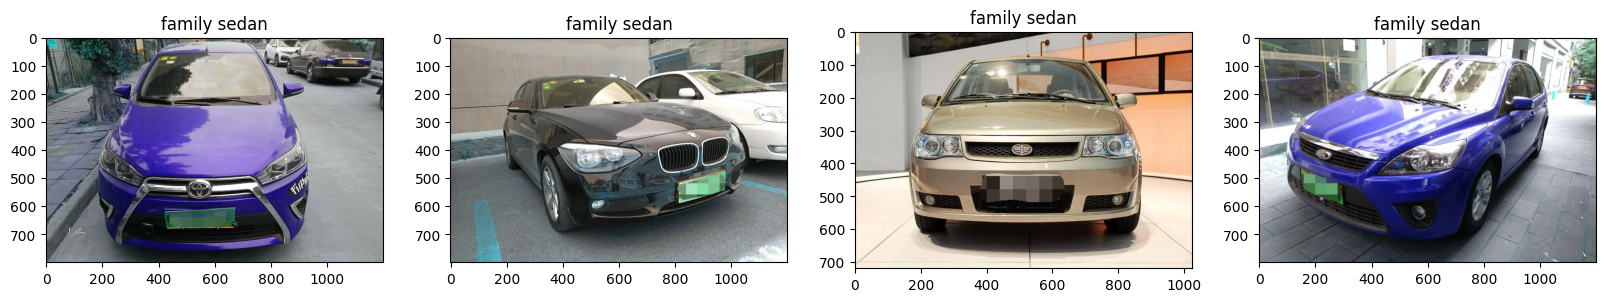

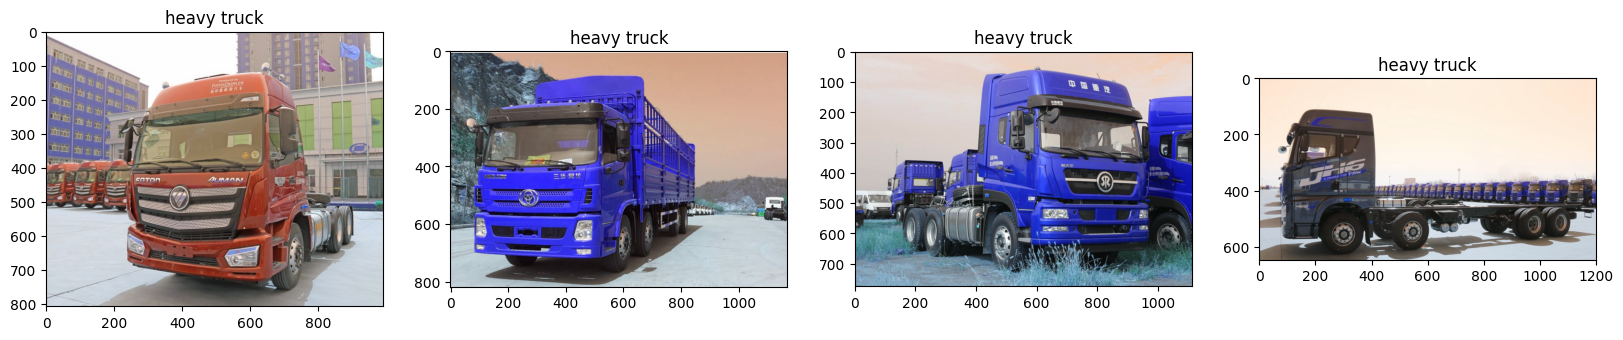

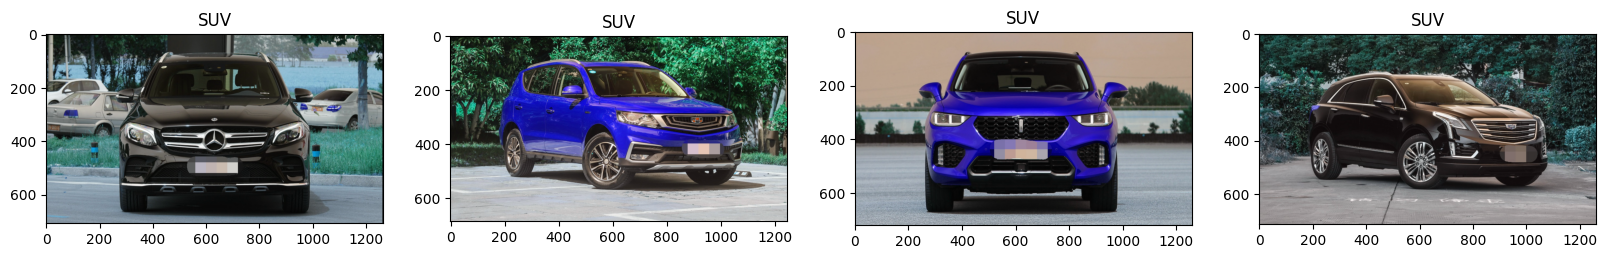

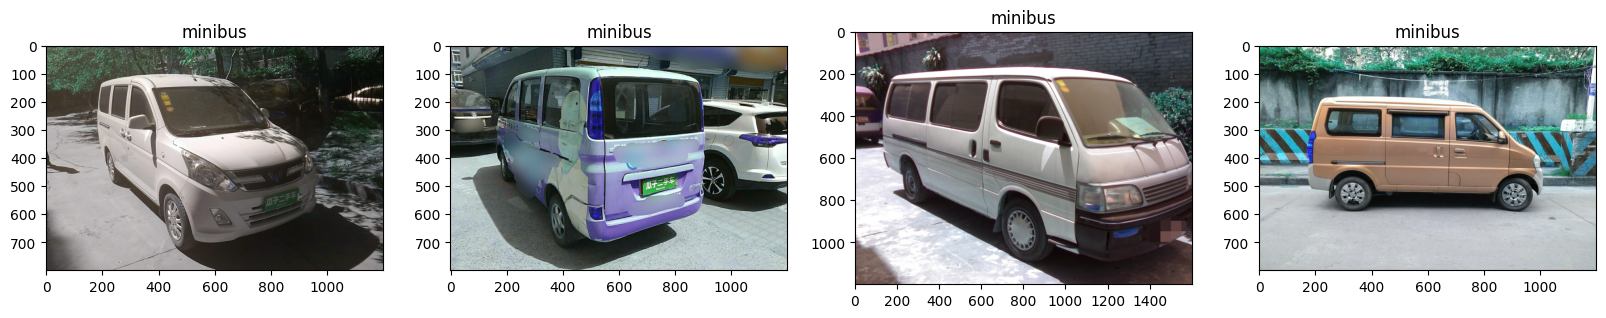

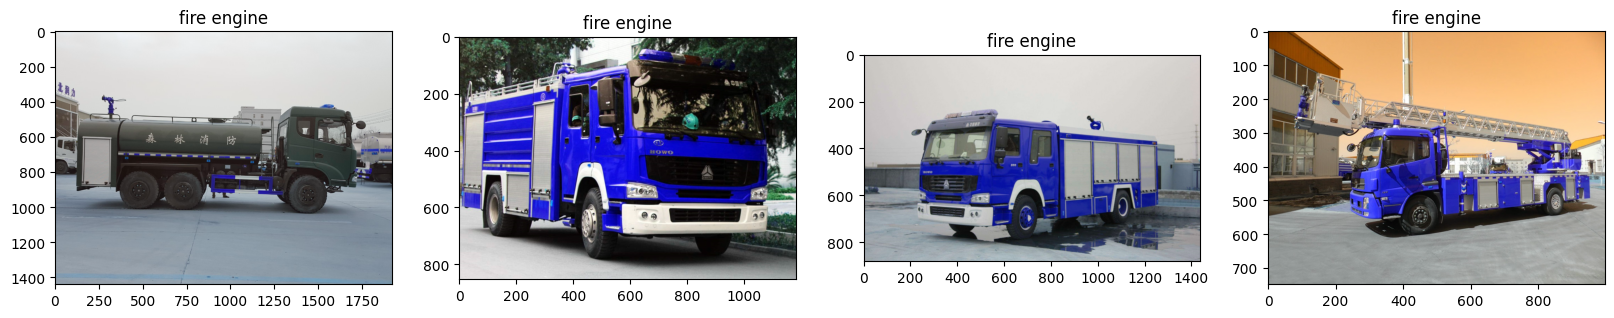

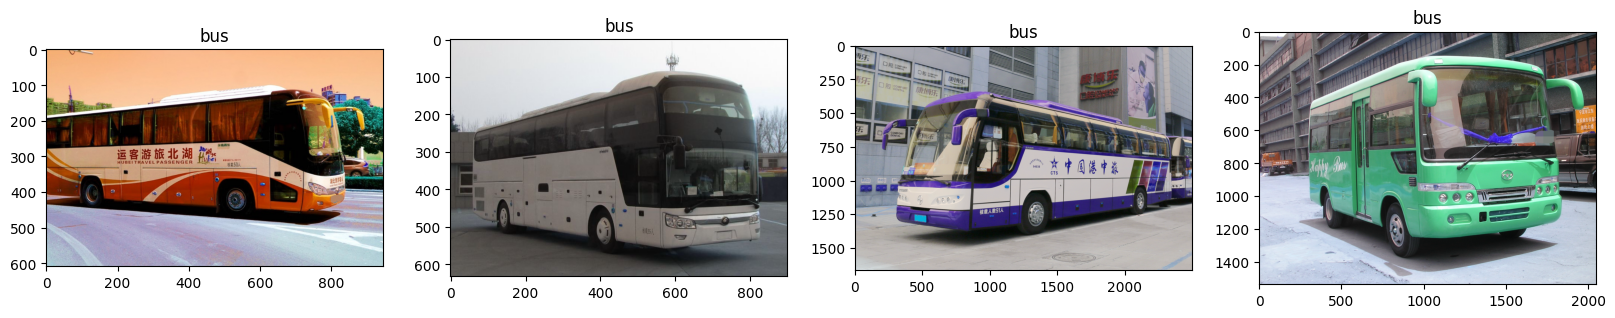

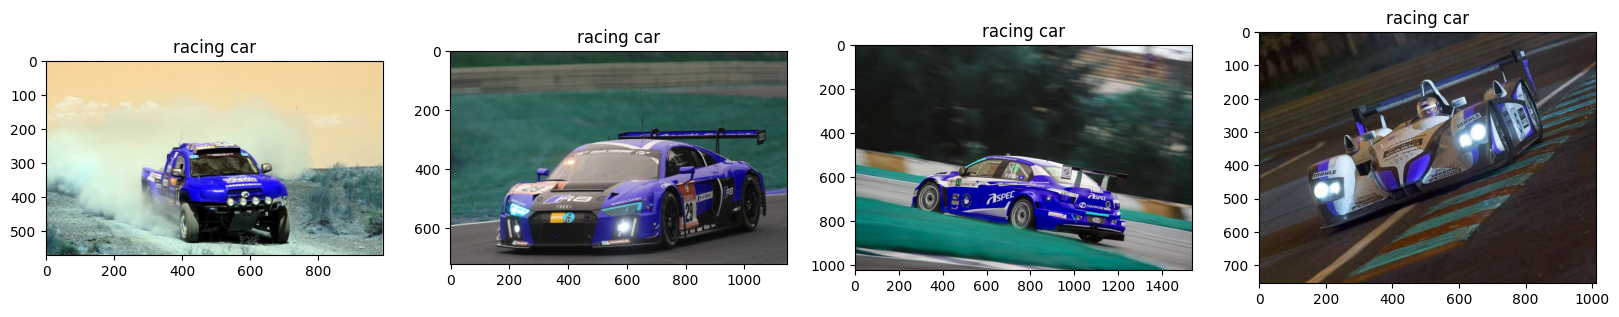

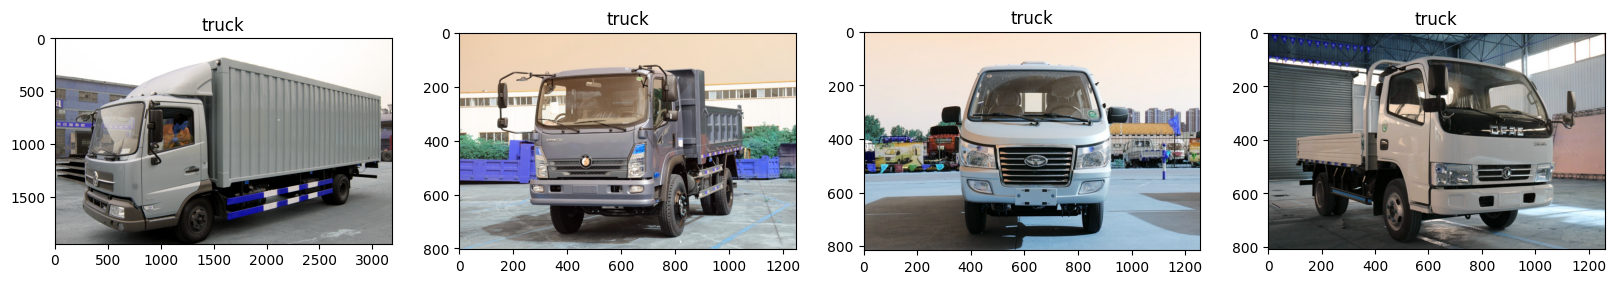

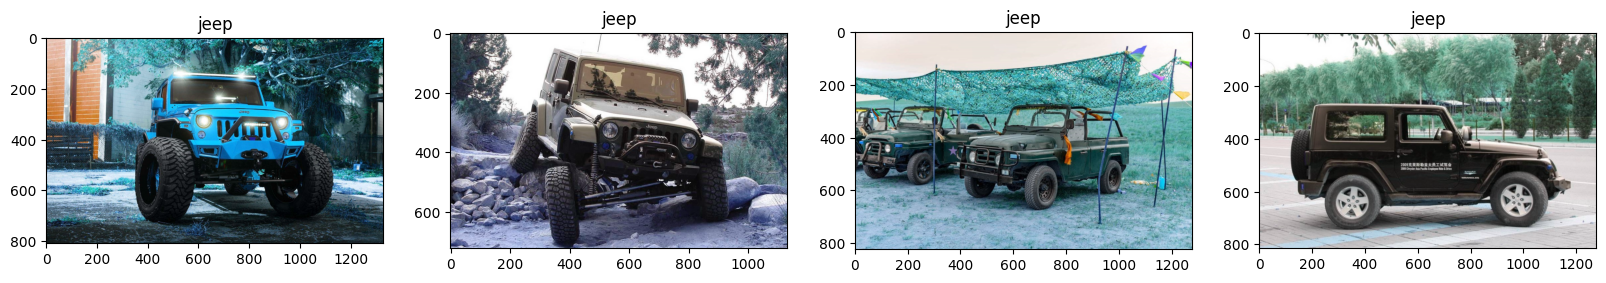

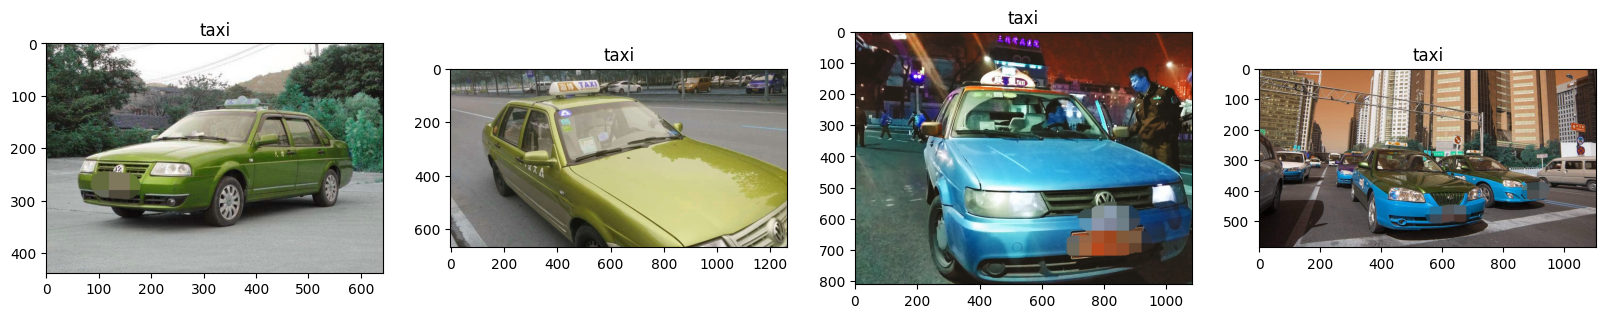

In [16]:
print("="*70)
print("Display 4 ranndom image setiap class")
print("="*70)

# for every class in `cols`
for j in range(len(cols)):
    plt.figure(j)
    plt.figure(figsize=(20,20))

    # 4 images per every class
    for i in range(4):
        id = "14{}".format(i+1)
        plt.subplot(int(id))
        random_file = random.choice(os.listdir(BASE + cols[j] + "/"))
        img = cv2.imread(BASE + cols[j] + "/" + random_file)
        plt.title(cols[j])
        plt.imshow(img)
plt.show()

In [19]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras import Model, layers
from keras.models import load_model, model_from_json

In [48]:
train_data_dir = './train'
val_data_dir = './val'
test_data_dir = './test'
batch_size = 64

In [49]:
# Create an ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)  # Set the validation split

In [50]:
# Create train and validation generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),  # Adjust based on the ResNet50 input size
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    subset='training')  # Specify if it's the training subset


Found 1120 images belonging to 10 classes.


In [51]:
validation_generator = train_datagen.flow_from_directory(
    val_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')  # Specify if it's the validation subset


Found 40 images belonging to 10 classes.


In [52]:
conv_base = ResNet50(
    include_top=False,
    weights='imagenet')

for layer in conv_base.layers:
    layer.trainable = False
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
predictions = layers.Dense(10, activation='softmax')(x)
model = Model(conv_base.input, predictions)



In [53]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [25]:
# model.summary()

In [55]:
# Calculate steps_per_epoch for training
steps_per_epoch_train = max(1, train_generator.samples // batch_size)

# Calculate validation_steps
validation_steps = max(1, validation_generator.samples // batch_size)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch_train,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_steps)

<ipython-input-55-1fa752ff1655>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
17/17 [==============================] - 28s 2s/step - loss: 2.4316 - accuracy: 0.0928 - val_loss: 2.3415 - val_accuracy: 0.1000
Epoch 2/50
17/17 [==============================] - 26s 2s/step - loss: 2.3185 - accuracy: 0.1023 - val_loss: 2.2917 - val_accuracy: 0.1000
Epoch 3/50
17/17 [==============================] - 25s 1s/step - loss: 2.2967 - accuracy: 0.1212 - val_loss: 2.2797 - val_accuracy: 0.1000
Epoch 4/50
17/17 [==============================] - 25s 1s/step - loss: 2.2715 - accuracy: 0.1496 - val_loss: 2.2466 - val_accuracy: 0.1250
Epoch 5/50
17/17 [==============================] - 26s 2s/step - loss: 2.2329 - accuracy: 0.1581 - val_loss: 2.2479 - val_accuracy: 0.1500
Epoch 6/50
17/17 [==============================] - 26s 2s/step - loss: 2.1861 - accuracy: 0.2027 - val_loss: 2.1339 - val_accuracy: 0.2250
Epoch 7/50
17/17 [==============================] - 27s 2s/step - loss: 2.1243 - accuracy: 0.2074 - val_loss: 2.0628 - val_accuracy: 0.2500
Epoch 8/50
17/17 [==

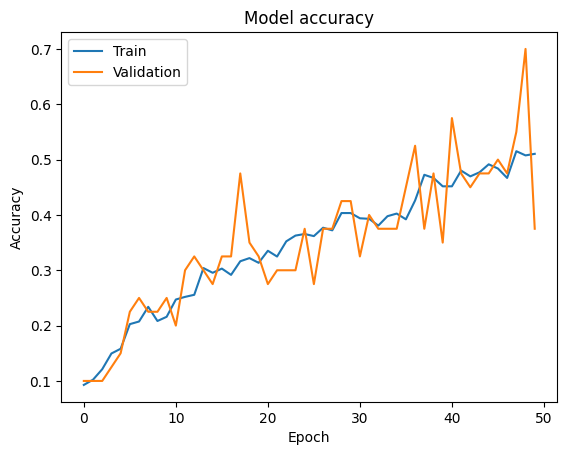

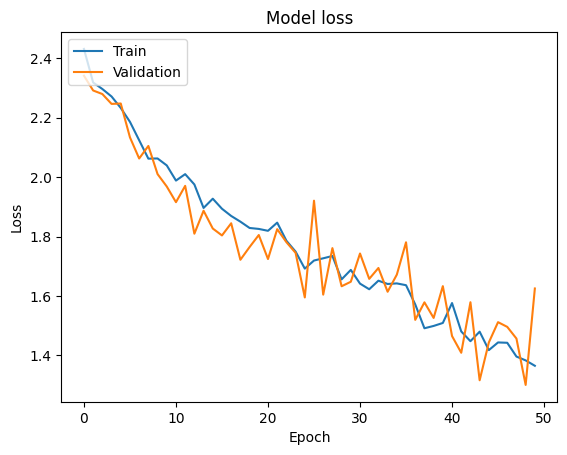

In [56]:
# Visualize training history
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Visualize training history
plot_training_history(history)

In [57]:
# Evaluate the model on the validation set
# # Calculate steps_per_epoch for training
# steps_per_epoch_train = max(1, train_generator.samples // batch_size)

# # Calculate validation_steps
# validation_steps = max(1, validation_generator.samples // batch_size)

val_loss, val_accuracy = model.evaluate_generator(validation_generator, steps=steps_per_epoch_train)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

<ipython-input-57-a4fa0da865ff>:8: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  val_loss, val_accuracy = model.evaluate_generator(validation_generator, steps=steps_per_epoch_train)


Validation Accuracy: 37.50%


In [58]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you have already trained your model and obtained the history object

# Get predictions from the validation generator
y_pred_prob = model.predict_generator(validation_generator, steps=validation_steps)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Get true labels from the validation generator
y_true = validation_generator.classes

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

<ipython-input-58-0820e5583271>:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred_prob = model.predict_generator(validation_generator, steps=validation_steps)


Confusion Matrix:
[[0 0 1 3 0 0 0 0 0 0]
 [0 1 0 0 0 1 0 2 0 0]
 [1 0 0 0 1 1 0 1 0 0]
 [0 1 0 1 1 0 1 0 0 0]
 [0 2 0 0 0 1 0 0 0 1]
 [0 1 0 1 1 0 1 0 0 0]
 [0 1 0 1 2 0 0 0 0 0]
 [1 1 0 0 1 0 0 0 0 1]
 [0 1 0 1 0 0 0 0 1 1]
 [0 1 0 1 2 0 0 0 0 0]]


In [59]:
from keras.preprocessing import image

1/1 [==============================] - 1s 1s/step
True Label: Unknown
Predicted Label: truck
Predictions: [[0.01242381 0.18753314 0.02824043 0.07654225 0.09604537 0.07722045
  0.13298883 0.00782738 0.07712197 0.30405632]]
Predictions: [[0.01242381 0.18753314 0.02824043 0.07654225 0.09604537 0.07722045
  0.13298883 0.00782738 0.07712197 0.30405632]]
Predicted Class Index: 9


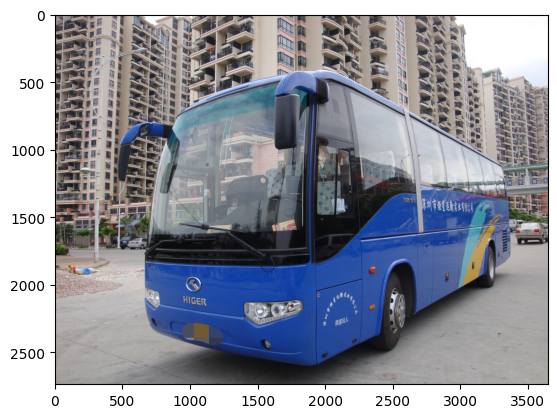

In [60]:
# Make example inferences
def make_predictions(model, img_path, target_size=(224, 224), true_label=None):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale pixel values to [0, 1]

    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)

    # Get class labels from the generator
    class_labels = list(validation_generator.class_indices.keys())

    # Get the true label name if provided
    true_label_name = class_labels[true_label] if true_label is not None else 'Unknown'

    # Display information
    print(f'True Label: {true_label_name}')
    print(f'Predicted Label: {class_labels[class_index]}')
    print('Predictions:', prediction)

    return prediction, class_index


# Replace 'example_image.jpg' with the path to your example image
example_img_path = './train/bus/024017bda63bf980f932736ced0daa17.jpg'

# Make predictions
predictions, class_index = make_predictions(model, example_img_path)
print('Predictions:', predictions)
print('Predicted Class Index:', class_index)
# print('class label', labels[class_index-1])
# Display the example image
img = image.load_img(example_img_path)
plt.imshow(img)
# plt.title(f'Predicted Class: {labels[class_index-1]}')
plt.show()

## Model 2

In [61]:
conv_base = ResNet50(
    include_top=False,
    weights='imagenet')

x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
predictions = layers.Dense(10, activation='softmax')(x)
model_2 = Model(conv_base.input, predictions)

optimizer = keras.optimizers.Adam()
model_2.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [62]:
# Create an ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)  # Set the validation split

In [63]:
# Create train and validation generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),  # Adjust based on the ResNet50 input size
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    subset='training')  # Specify if it's the training subset


Found 1120 images belonging to 10 classes.


In [64]:
validation_generator = train_datagen.flow_from_directory(
    val_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')  # Specify if it's the validation subset


Found 40 images belonging to 10 classes.


In [65]:
history_2 = model_2.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch_train,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_steps)

<ipython-input-65-4be50b6985d0>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_2 = model_2.fit_generator(


Epoch 1/10
17/17 [==============================] - 56s 1s/step - loss: 1.3890 - accuracy: 0.5511 - val_loss: 25.7836 - val_accuracy: 0.1000
Epoch 2/10
17/17 [==============================] - 27s 2s/step - loss: 0.8173 - accuracy: 0.7652 - val_loss: 35.2306 - val_accuracy: 0.1000
Epoch 3/10
17/17 [==============================] - 27s 2s/step - loss: 0.5213 - accuracy: 0.8419 - val_loss: 29.6435 - val_accuracy: 0.1000
Epoch 4/10
17/17 [==============================] - 27s 2s/step - loss: 0.4774 - accuracy: 0.8371 - val_loss: 108.9993 - val_accuracy: 0.1000
Epoch 5/10
17/17 [==============================] - 25s 1s/step - loss: 0.3987 - accuracy: 0.8731 - val_loss: 8.1053 - val_accuracy: 0.1000
Epoch 6/10
17/17 [==============================] - 24s 1s/step - loss: 0.3405 - accuracy: 0.8987 - val_loss: 24.9563 - val_accuracy: 0.1000
Epoch 7/10
17/17 [==============================] - 25s 2s/step - loss: 0.3041 - accuracy: 0.9110 - val_loss: 11.8014 - val_accuracy: 0.1000
Epoch 8/10
17

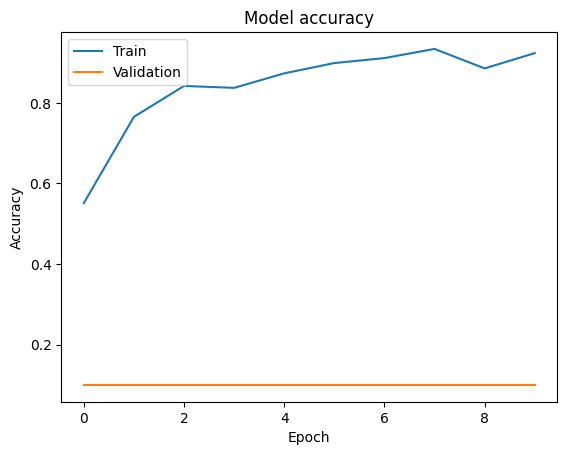

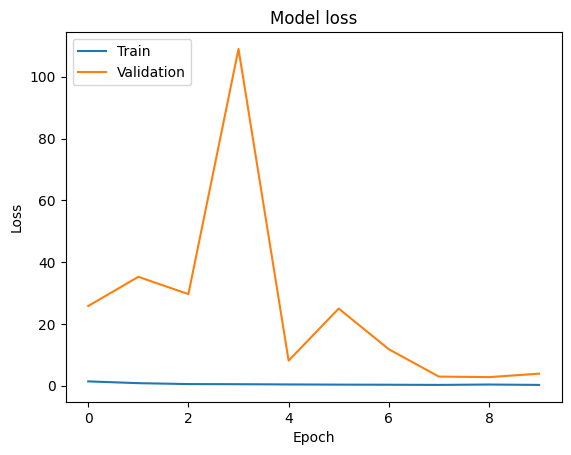

In [66]:
# Visualize training history
plot_training_history(history_2)

In [67]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model_2.evaluate_generator(validation_generator, steps=validation_steps)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

<ipython-input-67-043fbfaa5a20>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  val_loss, val_accuracy = model_2.evaluate_generator(validation_generator, steps=validation_steps)


Validation Accuracy: 10.00%


In [68]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you have already trained your model and obtained the history object

# Get predictions from the validation generator
y_pred_prob = model_2.predict_generator(validation_generator, steps=validation_steps)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Get true labels from the validation generator
y_true = validation_generator.classes

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

<ipython-input-68-e9a32b46e42f>:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred_prob = model_2.predict_generator(validation_generator, steps=validation_steps)


Confusion Matrix:
[[0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 4 0 0]]


1/1 [==============================] - 1s 874ms/step
True Label: Unknown
Predicted Label: racing car
Predictions: [[0.01312278 0.01569095 0.03779217 0.012086   0.01581113 0.02868294
  0.00538843 0.8404438  0.02928698 0.00169474]]
Predictions: [[0.01312278 0.01569095 0.03779217 0.012086   0.01581113 0.02868294
  0.00538843 0.8404438  0.02928698 0.00169474]]
Predicted Class Index: 7


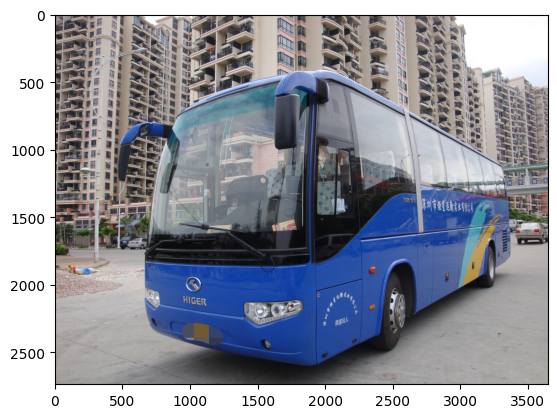

In [69]:
example_img_path = './train/bus/024017bda63bf980f932736ced0daa17.jpg'

# Make predictions
predictions, class_index = make_predictions(model_2, example_img_path)
print('Predictions:', predictions)

print('Predicted Class Index:', class_index)
# print('class label', labels[class_index-1])
# Display the example image
img = image.load_img(example_img_path)
plt.imshow(img)
# plt.title(f'Predicted Class: {labels[class_index-1]}')
plt.show()

In [70]:
from google.colab import drive
drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [71]:

model.save('/content/gdrive/My Drive/vehicle_classifier_1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [72]:

model_2.save('/content/gdrive/My Drive/vehicle_classifier_2.h5')

# Analisis
